# Classification dengan KNN (K Nearest Neighbours)

- KNN adalah model machine learning yang dapat digunakan untuk melakukan prediksi berdasarkan kedekatan karakteristik dengan sejumlah tetangga terdekat
- Prediksi yang dilakukan dapat diterapkan baik pada classification maupun regression tasks.
- Dalam sesi pembelajaran kali ini, kita akan berfokus pada penerapan KNN untuk classification tasks.

Referensi : https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

# Sample Dataset

In [38]:
# Code 01

import pandas as pd

sensus = {
    'tinggi': [158, 170, 183, 191, 155, 163, 180, 158, 178],
    'berat' : [64, 86, 84, 80, 49, 59, 67, 54, 67],
    'jk': [
        'pria', 'pria', 'pria', 'pria', 'wanita', 'wanita', 'wanita', 'wanita', 
        'wanita'
    ]
}

sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,berat,jk
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,180,67,wanita
7,158,54,wanita
8,178,67,wanita


Kali ini kita akan membentuk dataset yang berisi daftar berat dan tinggi badan sejumlah partisipan beserta gender atau jenis kelaminnya, dataset ini akan kita tampung ke dalam format Pandas DataFrame

Alur berpikir code 01 :
- Pertama, kita akan mengimport terlebih dahulu modul pandas.
- Lalu berikutnya, menyiapkan suatu variabel yang dalam hal ini adalah 'sensus' yang digunakan untuk menampung suatu data dictionary, dimana dictionary ini akan menampung 3 buah keys yaitu : tinggi, berat, dan jk.
- 'jk' akan berasosiasi dengan daftar jenis kelamin.
- 'tinggi' dan 'berat'akan berasosiasi dengan nilai tinggi badan dan berat badan.
- Lalu selanjutnya, dictionary ini akan kita tampung ke dalam suatu variabel dengan nama 'sensus'.
- Dictionary sensus akan dibentuk menjadi suatu Pandas DataFrame. Oleh karena itu, kita panggil dengan 'pd.DataFrame(sensus)'.
- Lalu objek DataFramenya, kita tampung ke dalam variabel 'sensus_df'.
- Kemudian kita tampilkan dengan memanggil 'sensus_df'.

Jika kita melihat dataset kita, dataset kita kali ini terdiri dari 3 buah kolom yaitu 'tinggi', 'berat', dan 'jk'. Dalam sesi pembelajaran kali ini, kita akan membentuk model machine learning sederhana yang dapat digunakan untuk memprediksi gender atau jenis kelamin seseorang berdasarkan data tinggi dan berat badanya. Dengan kata lain, data tinggi dan berat badan akan berperan sebagai features, sedangkan jenis kelamin akan berperan sebagai target.

# Visualisasi Data

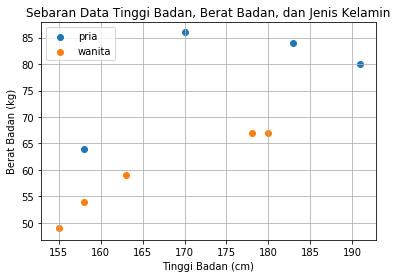

In [39]:
# Code 02

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)
    
plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()


Kita akan mencoba visualisasikan dataset sensus yang telah kita bentuk sebelmunya ke dalam scatter plot, dimana sumbu x akan berasosisasi dengan tinggi badan, sedangkan sumbu y akan berasosisasi dengan berat badan.

Disni kita juga akan menggunakan warna marker yang berbeda untuk merepresentasikan jenis kelamin pria dan wanita.

Alur berpikir code 02 :
- Import modul matplotlib.
- Lalu berikutnya, disini kita akan membentun subplots, dimana kita akan menangkap objek figure dan axes nya.
- Selanjutnya, kita akan melakukan looping terhadap data sensus df tersebut, dimana sensus df nya kita grouping terlebih dahulu berdasarkan 'jk' atau jenis kelaminnya.
- Pada setiap iterasinya, kita akan menangkap 2 nilai yaitu 'jk' yang merepresentasikan jenis kelamin berdasarkan pengelompokannya, dan yang kedua adalah 'd' yang berisi sekumpulan baris data dari kelompok jenis kelamin tertentu. Karena kita ingin membentuk scatter plot, maka kita panggil 'ax.scatter', dimana sumbu x nya akan diasosiasikan dengan data baris dengan kolom 'tinggi', sedangkan sumbu y akan diasosiasi dengan data baris dengan kolom 'berat', lalu kita sertakan label dimana label tersebut akan disesuaikan dengan kelompok jenis kelaminnya.
- Lalu berikutnya, kita akan menyertakan beberapa keterangan tambahan diantarnya adalah legend, yang akan berasosiasi dengan 'label=jk'. Jika kita tidak menyertakan parameter 'label', maka legendnya hanya akan menampilkan warna biru dan orange tanpa disertai label pria dan wanita. Lalu berikutnya, ketika kita memanggil 'plt.legend' kita juga menyertakan parameter 'loc', parameter 'loc' ini digunakan untuk mengatur lokasi atau posisi dari legendnya, yang dalam kasus ini 'loc' nya sebagai upper left, berarti posisinya ada di sudut kiri atas.
- Selanjutnya, sebagai data tambahan disini kita akan menyertakan judul, label untuk sumbu x dan juga sumbu y 'plt.title', 'plt.xlabel', 'plt.ylabel'.
- Selain itu, kita juga akan sertakan 'plt.grid' yang diberi nilai true.
- Terakhir, kita memanggil 'plt.show' untuk memunculkan hasil ploting kita

Jika kita hitung jumlah markernya dari hasil output code 02, berjumlah 9 marker, kesembilan marker ini akan berasosiasi dengan setiap baris dari dataset kita (lihat lagi output code 01), bisa kita lihat dalam pandas dataframe kita memiliki 9 buah entries atau row atau instances. Oleh karena itu, setiap baris ini akan menghasilkan satu data point pada scatter plot nya. Bisa kita lihat juga bahwa data 'pria' ada empat, sedangkan data 'wanita' ada 5.

Pada kasus kita kali ini, tujuan utamanya adalah ketika kita menemukan suatu data point baru, maka data point tersebut akan coba diprediksi apakah dia masuk kedalam kategori 'pria' atau 'wanita.

# Classification dengan KNN

Setelah kita memahami konteks dataset dan juga permasalahannya, kita akan mencoba menerapkan KNN atau Key Nearest Neighbours untuk melakukan klasifikasi jenis kelamin berdasarkan data tinggi dan berat badan. Sesuai dengan namanya, model machine learning yang satu ini akan melakukan prediksi yang dalam kasus ini adalah prediksi gender atau jenis kelamin berdasarkan kemiripan karakteristik atau features dengan dataset yang kita miliki. KNN juga termasuk salah satu model machine learning dasar yang wajib dikuasai.

# Preprocessing Dataset

In [40]:
# Code 03

import numpy as np

X_train = np.array(sensus_df[['tinggi', 'berat']])
y_train = np.array(sensus_df['jk'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')
      

X_train:
[[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [178  67]]

y_train: ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']


Sebelum kita melangkah kepada proses training model, kita perlu melakukan beberapa penyesuaian pada dataset sensus tersebut, dimana kita akan mengkonversikan data tinggi badan dan berat badan ke dalam numpy array. Selanjutnya kita tampung ke dalam variabel 'X_train' sebagai sekumpulan features untuk training set. Lalu untuk kolom 'jenis kelamin' juga kita akan konversikan menjadi numpy array untuk selanjutnya kita tampung ke dalam variabel 'y_train' sebagai sekumpulan nilai target untuk training set.

Alur berpikir code 03 :
- Pertama-tama, kita akan import numpy as np.
- Lalu kita akan bentuk 2 buah numpy array. Untuk numpy array yang pertama akan kita bentuk berdasarkan kolom tinggi dan berat dari 'sensus_df' yang ditampung ke dalam variabel 'X_train', sedangkan numpy array kedua kita akan bentuk berdasarkan kolom 'jk' dari 'sensus_df' yang kita tampung ke dalam variabel 'y_train'.
- Lalu kita tampilkan dengan cara di print kedua variabel tersebut.

Berdasarkan output code 03, X_train berisi sekumpulan nilai features, sedangkan y_train akan berisi sekumpulan nilai target. Jika kita perhatikan pada output code 03 sekumpulan nilai features untuk training set yang kita miliki sudah dalam format array dua dimensi dan tipe datanya pun sudah berupa data numerik, artinya sekumpulan nilai features ini sudah siap digunakan untuk proses training. Tetapi jika kita perhatikan nilai targetnya, tipe datanya berupa string. Sebenarnya untuk kasus classification dengan KNN, target dengan tipe data string tetap bisa diproses dengan baik, hanya saja kita akan menghadapi kendala ketika kita ketika kita melakukan evaluasi model. Oleh karena itu, pada kasus ini kita akan mengkonversikan nilai string menjadi nilai numerik. 


Karena jenis kelamin ini hanya terdiri dari 2 nilai, dalam kasus ini adalah 'pria' dan 'wanita', maka kita bisa memanfaatkan label binarizer untuk melakukan konversi nilai string tersebut menjadi numerik biner (lihat pada code 04).

In [41]:
# Code 04

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


Alur berpikir code 04 :
- Kita bisa memanfaatkan class preprocessing yang disertakan oleh SkLearn yaitu LabelBinarizer. Oleh karena itu pertama-tama, kita lakukan import modul ('from sklearn.preprocessing import LabelBinarizer').
- Lalu berikutnya, kita akan mencoba membentuk objek dari class label binarizer ini, dengan cara memanggil ('lb = LabelBinarizer()') yang akan ditampung ke dalam variabel 'lb'.
- Selanjutnya, objek label binarizer tersebut akan kita manfaatkan untuk melakukan transformasi data yang terdapat dalam variabel 'y_train'. Oleh karena itu, kita akan panggil ('lb.fit_transform(y_train)') yang nilainya kita tampung kembali ke dalam variabel 'y_train'.
- Terakhir kita akan melakukan print out terhadap variabel 'y_train'.

Pada output tersebut hanya terdapat 2 nilai yaitu 0 dan 1. Dalam hal ini nilai nol akan merepresentasikan data pria, sedangkan nilai satu akan merepresentasikan data wanita.

Jika kita perhatikan pada output code 04 tersebut, setelah melalui proses transformasi data dengan label binarizer, sekumpulan nilai target yang kita miliki ini, sekarang tersimpan dalam format array 2 dimensi. Oleh karena itu, kita perlu kembalikan menjadi array satu dimensi dengan method flatten (pada code 05).

In [42]:
# Code 05

y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [0 0 0 0 1 1 1 1 1]


Alur berpikir code 05 :
- Memanggil fungsi 'y_train.flatten()' yang akan ditampung ke dalam variabel y_train.
- Lakukan pemanggilan dengan print untuk melihat hasilnya.  


# Training KNN Classification Model

Setelah training setnya kita persiapkan, selnjutnya kita akan melangkah ke proses training model. Kali ini model machine learning yang akan kita gunakan adalah KNN.

In [43]:
# Code 06

from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Alur berpikir code 06 :
- Pertama-tama kita akan import terlebih dahulu estimater class nya 'from sklearn.neighbors import KNeighborsClassifier'. Disini kita memilih KNeighbors Classifier karena kita akan menggunakan KNN ini untuk clasification task.
- Disini terdapat satu parameter yang harus kita spesifikasikan nilainya yaitu paremeter 'K'. Untuk kasus kali ini nilai 'K' kita akan set sebagai 3. Nilai parameter 'K' ini digunakan untuk menentukan jumlah tetangga terdekat yang akan dilibatkan untuk proses prediksi, dan untuk kasus kita kali inim adalah 3 tetangga terdekat.
- Setelah nilai 'K' kita tentukan, selanjutnya kita akan membentuk objek dari class KNeighbors Classifier. KNeighbors Classifier ini akan membutuhkan satu parameter yaitu n_neighbors yang kita beri nilai 'K' lalu kita tampung kedalam variabel 'model'.
- Untuk selanjutnya, kita akan melakukan training dengan memanfaatkan X_train dan y_train yang sudah kita persiapkan sebelumnya.
- Pada kali ini, proses trainingnya akan kita lakukan dengan cara memanggil 'model.fit(X_train, y_train)'

Setelah modelnya kita training (lihat pada output code 06), maka status dari model ini adalah train model atau model yang sudah di training. Pada kali ini, proses trainingnya terbilang cepat  karena ukuran data set yang kita miliki juga terbilang sangat kecil.

# Prediksi Jenis Kelamin 

Setelah model KNN Classifier nya kita training, tahapan selanjutnya kita akan menggunakan train model ini untuk melakukan prediksi gender berdasarkan data tinggi dan berat badan. Disini kita akan mempersiapkan terlebih dahulu data baru yang akan kita gunakan untuk prediksi.

In [44]:
# Code 07

tinggi_badan = 155
berat_badan = 70
X_new = np.array([tinggi_badan, berat_badan]).reshape(1, -1)
X_new

array([[155,  70]])

Alur berpikir code 07 :
- Disini semisal saja kita memiliki data tinggi badan sebesar 155 dan berat badan sebesar 70 yang akan kita prediksi jenis kelaminnya apakah pria atau wanita.
- Pada kali ini, nilai featuresnya harus kita bentuk dulu menjadi suatu numpy array. Oleh karenanya, disini kita panggil 'np.array' lalu kita bundle tinggi badan dan berat badannya '([tinggi_badan, berat_badan])'. Karena disini hanya terdapat satu dataset atau instance saja, maka perlu kita melakukan reshape menjadi array 2 dimensi 'reshape(1, -1)'. Lalu array ini akan kita tanpung ke dalam variabel 'X_new'.
- Lalu terkahir kita akan coba tampilkan.

Bisa kita lihat pada outputnya (code 07), array nya adalah array 2 dimensi dimana jumlah barisnya adalah satu dan jumlah kolom nya adalah dua.

Setelah data tinggi dan berat badanny siap, selanjutnya kita akan melakukan prediksi gender dengan memanfaatkan model KNN Classifier yang sudah kita training sebelumnya (lihat pada code 08). 

In [45]:
# Code 08

y_new = model.predict(X_new)
y_new

array([1])

Alur berpikir code 08 :
-  Memanggil fungsi 'model.predict' lalu kita sertakan '(X_new)' nya dimana hasil prediksinya akan kita tampung kedalam variabel 'y_new'.
- Lalu kita tampilkan pada layar.

Berdasarkan hasil output code 08, kita bisa simpulkan bahwa tinggi badan 155 dan berat badan 70, ini akan diprediksi memiliki jenis kelamin [1]. 

In [46]:
# Code 09

lb.inverse_transform(y_new)

array(['wanita'], dtype='<U6')

Output code 09 merupakan hasil konveri baliknya, disini kita bisa mengetahui bahwa nilai 1 untuk target itu berkolerasi dengan jenis kelamin wanita atau dengan kata lain, tinggi badan 155 dengan berat badan 70 tersebut diprediksi sebagai data 'wanita' oleh model yang sudah kita training sebelumnya. 

# Visualisasi Nearest Neighbours

Untuk dapat memahami cara kerja KNN dengan lebih baik, kita akan mencoba visualisasikan posisi data baru tadi terhadap sekumpulan data tinggi dan berat badan yang kita gunakan sebelumnya untuk training model KNN.

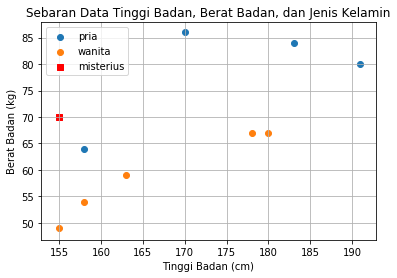

In [47]:
# Code 10

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.scatter(tinggi_badan,
           berat_badan,
           marker='s',
           color='red',
           label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

Alur berpikir code 10 :
- Kita tidak perlu mengimport matplotlib karena cukup sekali saja.
- Memanggil 'plt.subplots()' untuk mendapatkan objek figure dan axes nya.
- Lalu berikutnya, kita akan mencoba tampilkan kembali data points dari dataset yang kita miliki. Caranya kurang lebih sama dengan cara sebelumnya, hanya saja disini kita akan menyertakan marker baru pada scatter plot kita. Marker baru ini dihasilkan dengan memanggil  'plt.scatter' dimana nilai x nya itu berasal dari variabel tinggi_badan daan nilai y nya berasal dari berat_badan, sedangkan untuk  markernya kita beri nilai 's' karena kita bentuk markernya sebagai square atau kotak. Lalu color kita berikan warna merah 'red', dan labelnya kita beri label 'misterius'.

# Kalkulasi Distance (Euclidean Distance)

$distance = \sqrt{(t_1 - t_2)^2  + (b_1 - b_2)^2 }$

Referensi : https://en.wikipedia.org/wiki/Euclidean_distance

Setelah kita mempelajari cara kerja KNN secara umum atau secara general, berikutnya kita akan pelajari bagimana KNN mengukur jarak atau kedekatan antara data baru yang diprediksi dengan sekumpulan data lain pada dataset training. Pada kali ini, kita akan mengenal euclidean distance untuk mengukur jarak antara satu data ponit dengan data point lainnya. 

Untuk selanjutnya, sejumlah K data point dengan jarak terdekat inilah yang akan digunakan oleh KNN sebagai nearest neighbors atau tetangga terdekatnya.

Bila kita perhatikan pada rumus Euclidean Distance :
- t : merepresentasikan tinggi badan.
- b : merepresentasikan berat badan.
- t1 : merepresentasikan data tinggi badan dari data point yang pertama.
- t2 : merepresentasikan data tinggi badan dari data point yang kedua.
- b1 : merepresentasikan data berat badan dari data point yang pertama. 
- b2 : merepresentasikan data berat badan dari data point yang kedua.

Formula atau rumus tersebut dapat kita gunakan untuk mengukur jarak atau distance atau kedekatan antara data point pertama dengan data point kedua.

Selanjutnya, kita akan coba untuk melakukan proses kalkulasi yang diterapkan oleh KNN dalam menentukan tetangga terdekat untuk suatu data point yang akan diprediksi.

In [48]:
# Code 11

misterius = np.array([tinggi_badan, berat_badan])
misterius

array([155,  70])

In [49]:
# Code 12

X_train

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [178,  67]], dtype=int64)

In [50]:
# Code 13

from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in X_train]
data_jarak

[6.708203932499369,
 21.93171219946131,
 31.304951684997057,
 37.36308338453881,
 21.0,
 13.601470508735444,
 25.179356624028344,
 16.278820596099706,
 23.194827009486403]

In [51]:
# Code 14

sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

,tinggi,berat,jk,jarak
0,158,64,pria,6.708204
5,163,59,wanita,13.601471
7,158,54,wanita,16.278821
4,155,49,wanita,21.000000
1,170,86,pria,21.931712
8,178,67,wanita,23.194827
6,180,67,wanita,25.179357
2,183,84,pria,31.304952
3,191,80,pria,37.363083


Alur berpikir code 11-14:
- Pertama, data point misterius tersebut akan kita bentuk terlebih dahulu ke dalam format numpy array 'np.array([tinggi_badan, berat_badan])'.
- Lalu selanjutnya akan kita tampung ke dalam variabel misterius.
- Lalu berikutnya (pada code 12), kita akan tampilkan sekumpulan nilai features dari training set kita. Berdasarkan hasil output code 12, kita akan mencoba hitung jarak berdasarkan euclidean distance antara data point misterius (hasil output code 11) dengan setiap data point lain pada dataset 'X_train' (hasil output code 12).
- Untuk menghitung jarak antara keduanya, kita gunakan function euclidean yang sudah disertakan pada scipy (pada code 13).
- Caranya cukup mudah, kita hanya tinggal memanggil method atau function 'from scipy.spatial.distance import euclidean'.
- Lalu berikutnya kita tinggal pakai saja euclidean distancenya. Pada code 13 baris code kedua, funtion euclidean system tersebut digunakan untuk mengukur jarak atau kedekatan atau distancenya antara data point misterius dengan suatu data point lain (dalam kasus ini adalah 'd') di dalam variabel 'X_train' yang ditampung ke dalam variabel 'data_jarak'.
- Kemudian kita tampilkan ke layar.
- Pada hasil output code 13, kita bisa melihat bahwa jarak antara data point misterius dengan data point pertama pada 'X_train' (158) adalah (6.708203932499369) dan seterusnya.
- Selanjutnya untuk mempermudah proses pengamatan, kita akan membentuk kolom baru pada 'sensus_df' dengan memanfaatkan data jarak pada hasil output 13 (perhatikan pada code 14). Oleh karena itu, kita hanya tinggal memanggil 'sensus_df['jarak'] = data_jarak' artinya disini  kita akan membentuk kolom  baru pada sensus df dengan nama jarak, lalu datanya kita ambil dari variabel 'data_jarak' (pada code 13)
- Untuk selanjutnya, DataFrame 'sensus_df' ini akan kita urutkan nilainya berdasarkan kolom jarak. Dalam hal ini, pengurutan dilakukan secara ascending artinya dari nilai terkecil sampe yang terbesar (lihat pada code 14)
- Pada hasil output code 14, kita bisa melihat bahwa datanya sudah terurut berdasarkan kolom jarak. Karena untuk kasus kita kali ini nilai 'k' nya adalah 3, maka kita akan hanya memperhatikan 3 data point dengan jarak terdekat atau jarak terkecil dengan data point misterius yang kita miliki. Oleh karenanya, bisa kita lihat pada output code 14 juga, bahwa 3 baris pertama merupakan 3 neighbor terdekat yang akan kita perhatikan untuk melakukan proses prediksi.
- Untuk neigbor pertama, jenis kelaminnya adalah pria, neighbor kedua jenis kelaminnya adalah wanita, dan neighbor yang ketiga jenis kelaminnya adalah wanita.
- Berdasarkan data neighbors tersebut, makan nilai KNN akan memprediksi data point misterius tersebut sebagai data wanita.

# Evaluasi KNN Classification Model

Setelah memahami bagaiman KNN seleksi tetangga terdekat, selanjutnya kita akan mulai mempelajari beberapa matriks yang bisa kita gunakan untuk mmengukur performa dari model machine learning untuk kasus classification task dengan menyiapkan terlebih dahulu testing set nya.

# Testing Set

In [52]:
# Code 15

X_test = np.array([[168, 65], [180, 96], [160, 52], [169, 67]])
y_test = lb.transform(np.array(['pria', 'pria', 'wanita', 'wanita'])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}')

X_test:
[[168  65]
 [180  96]
 [160  52]
 [169  67]]

y_test:
[0 0 1 1]


Alur berpikir code 15 :
- Code tersebut berupa testing set, diman testing set tersebut terdiri dari 4 data point. Oleh karena itu, kita akan menyiapkan numpy array yang terdiri dari 4 baris dan 2 kolom sebagai 'X_test'.
- Lalu berikutnya, disini kita akan menyiapkan target yang terdiri dari 4 data yaitu 'pria', 'pria', 'wanita', 'wanita' yang harus kita transformasikan menjadi nilai numerik biner dengan memanfaatkan label binarizer dengan memanggil 'lb.transform' yang akan menghasilkan array 2 dimensi, padahal yang kita harapkan untuk 'y_test'adalah array 1 dimensi. Oleh karena itu, disini kita perlu memanggil method flatten.
- Jika kita lihat pada hasil outputnya sudah sesuai dengan harapan kita yang dimana X_test nya terdiri dari sekumpulan nilai numerik yang di bundle atau dikemas sebagai array 2 dimensi. Demikian juga nilai y_test nya yang terdiri dari sekumpulan nilai numerik biner untuk kasus kita kali ini yang di bundle dalam suatu numpy array satu dimensi.

# Prediksi Terhadap Testing Set

In [53]:
# Code 16

y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1])

Setelah testing setnya siap (pada code 15), selanjutnya kita akan melakukan prediksi terhadap testing set tersebut dengan memanfaatkan model KNN Classifier yang sudah kita training sebelumnya.

Pola berpikir code 16 :
- Memanggil 'model.predict(X_test)' yang kita prediksi adalah nilai X_test nya yang akan kita tampung ke dalam variabel y_pred.
- Lalu kita panggil kembali fungsi tersebut untuk melihat hasilnya.

Bisa kita lihat pada hasil output code 16, nilai yang diharapkan adalah nilai yang ada di dalam y_test (lihat pada output code 15), dimana [0, 0, 1, 1] sedangkan model prediksi yang kita peroleh (pada code 16) adalah [1, 0, 1, 1] yang kita tampung kedalam variabel y_pred. Untuk fase evaluasi, pada intinya adalah kita akan membandingkan nilai y_test (pada output code 15) dengan nilai y_pred nya (pada output code 16).

# Accuracy

Matrik evaluasi pertama yang akan kita pelajari adalah akurasi.

Accuracy is the proportion of test instances that were classified correctly. Dengan kata lain, akurasi adalah proprosi dari instance pada training set yang diklasifikasikan secara benar atau yang berhasil diprediksi dengan tepat.



$accuracy  =  \frac{tp + tn}{tp + tn + fp + fn}$ 

Bila kita perhatikan pada rumus accuracy :
- tp = true positive
- tn = true negative
- fp = false postive
- fn = false negative

True postif dan truen negatif merepresentasikan hasil prediksi atau klasifikasi yang benar. True postive berarti sesuatu yang bernilai positif telah dengan tepat diprediksi sebagai positif oleh model, sedangkan true negative berarti sesuatu yang bernilai negatif telah dengan tepat diprediksi sebagai sesuatu yang negatif oleh model atau dengan kata lain. 

Jika mengacu pada kasus tersebut, true positif berarti model sudah dengan tepat memprediksi data pria sebagai pria dan data wanita sebagai wanita, sedangkan true negatif berarti model sudah dengan tepat memprediksi sebagai data wanita sebagai bukan pria dan data pria sebagai bukan wanita.

Dua istilah berikutnya adalah false positive dan false negative, keduanya merepresentasikan hasil prediksi atau klasifikasi yang salah. False positive berarti sesuatu yang bernilai negatif telah keliru diprediksi sebagai positif oleh model. Sedangkan false negative, berarti sesuatu yang bernilai postif telah keliru diprediksi sebagai negatif oleh model atau jika kita kita mengacu pada kasus tersebut, false positif berarti model sudah dengan keliru memprediksi data wanita sebagai pria dan data pria sebagai wanita, sedangkan false negative berarti model sudah dengan keliru memprediksi data pria sebagai bukan pria dan data wanita sebagai bukan wanita.

Referensi : https://en.wikipedia.org/wiki/Precision_and_recall

In [54]:
# Code 17

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy: {acc}')

Accuracy: 0.75


Code 17 merupakan tahapan menggunakan matriks accuracy untuk melakukan evaluasi model machine learning pada SKLearn.

Alur berpikir code 17 :
- Memangil method 'from sklearn.metrics import accuracy_score'.
- Lalu cara pemanfaatannya cukup sederhana, kita tinggal memanggil saja 'accuracy_score' dengan menyertakan 2 buah parameter. Parameter pertama adalah 'y_test' dan parameter kedua adalah 'y_pred'. 'y_test' merupakan target dari testing set, sedangkan 'y_pred' merupakan hasil prediksi untuk target dari testing setnya, lalu nilai akurasi ini kita tampung ke dalam variabel acc.
- Lalu kita tampilkan ke layar.

Bisa kita lihat pada output code 17, nilai akurasinya adalah 0.75 atau ddengan kata lain nilai akurasinya adalah 75%.

# Precission

Matrik evaluasi pertama yang akan kita pelajari adalah precission. Precission is the proportion of test instances that were predicted to be positive that are truly positive. Dalam bahasa indonesia, presisi adalah proporsi dari tetsing set yang diprediksi sebagai positif oleh model, yang memang benar-benar positif.  

$precission  =  \frac{tp}{tp  \ + \  fp}$

Bila kita perhatikan pada rumus atau formula precission :
- tp : merepresentasikan nilai true positive.
- fp : merepresentasikan nilai false positive.

Referensi : https://en.wikipedia.org/wiki/Precision_and_recall

Selanjutnya kita akan mencoba melakukan tahapan matrix precision tersebut untuk melakukan evaluasi model machine learning pada SKLearn (perhatikan pada code 18).

In [55]:
# Code 18

from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)

print(f'Precission: {prec}')

Precission: 0.6666666666666666


Alur berpikir code 18 :
- Pertama, kita import terlebih dahulu precision score nya dengan cara 'from sklearn.metrics import precision_score'.
- Lalu untuk menggunakannya sama seperti cara kita menggunakan evaluation matrix yang lainnya, kita cukup memanggil 'precision_score(y_test, y_pred)', disini kita menyertakan nilai 'y_test' dan juga 'y_pred' sebagai parameternya. 
- Lalu hasilnya kita akan tampung ke dalam variabel 'prec'.
- Kemudian kita tampilkan dengan cara print.

Bisa kita lihat pada hasil output code 18, bahwa nilai precissionnya adalah 0.6666 sekian atau disini kita bisa bilang bahwa nilai precisionnya adalah 66,66%.

# Recall

Recall is the proportion of truly postive test instances that were predicted to be positive. Dalam bahasa indonesia kita bisa bilang bahwa recall adalah proporsi dari data pada testing set kita yangi memang benar-benar positif yang diprediksi sebagai positif oleh model kita.

$recall  =  \frac{tp}{tp + fn}$

Bila kita perhatikan pada formula atau rumus recall :
- tp : merepresentasikan nilai true positive.
- fn : merepresentasikan nilai false negativ.

Referensi : https://en.wikipedia.org/wiki/Precision_and_recall

In [56]:
# Code 19

from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print(f'Recall: {rec}')

Recall: 1.0


Alur berpikir code 19 :
- Pertama, kita mengimport 'from sklearn.metrics import recall_score'
- Lalu pemanfaatannya, kita tinggal memanggil 'rec = recall_score(y_test, y_pred)'. Seperti biasa nilai 'y_test' dan 'y_pred' merupakan parameternya, yang kita tampung ke dalam variabel 'rec'.
- Terakhir kita tampilkan dengan print.

Berdasarkan output code 19, nilai recall nya adalah 1 yang merupakan nilai tertinggi atau dengan kata lain, nilai recall nya adalah 100%.

# F1 Score

Metriks selanjutnya yang akan kita pelajari adalah F1 Score.

The F1 score is the harmonic mean of precision and recall. Dalam bahasa indonesia yaitu f1 score merupakan harmonik mean atau nilai rata-rata harmonik dari percision dan recall. 

$F1  =  2 \ \times \ \frac{precision \ \times \ recall}{precision \ + \ recall}$

Referensi : https://en.wikipedia.org/wiki/Precision_and_recall

In [57]:
# Code 20

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f'F1-score: {f1}')

F1-score: 0.8


Alur berpikir code 20 :
- Pertama-tama kita akan mengimport terlebih dahulu 'from sklearn.metrics import f1_score'.
- Lalu untuk menggunakannya juga sama, kita hanya tinggal memanggil 'f1 = f1_score(y_test, y_pred)' dimana 'y_test' dan 'y_pred' sebagai parameternya yang akan kita tampung ke dalam variabel 'f1'.
- Terakhir kita tampilkan pada layar hasilnya.

Berdasarkan output code 20, kita memeroleh f1-score nya adalah 0.8.


# Classification Report

Keempat matriks yang sudah kita bahas sebelumnya, juga bisa ditampilkan secara keseluruhan sebagai classification report. Sesuai dengan namanya, keempat matriks tersebut memang digunakan untuk mengukur performa model pada classification task.  

Berikut kita akan mencoba cara untuk menampilkan classification report dengan memanfaatkan SKlearn (perhatikan pada code 21). 

In [58]:
# Code 21

from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)

print(f'Classification Report :\n{cls_report}')

Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



Alur berpikir code 21 :
- Pertama, kita panggil dengan menggunakan 'from sklearn.metrics import classification_report'.
- Lalu pemanfaatannya juga sama dengan matriks yang lainnya, kita tinggal memanggil 'classification_report(y_test, y_pred)', dimana 'y_test' dan 'y_pred' merupakan parameternya lalu kita akan tampung ke dalam variabel 'cls_report.
- Terakhir, kita akan tampilkan ke layar dengan print.

Bisa kita lihat pada output code 21, kita bisa melihat nilai precision, recall, dan f1-score dan juga kita bisa lihat pengklasifikasiannya. Keempat matriks evaluasi yang kita pelajari ini ditunjukan untuk binary classifier, dimana berapa pun banyaknya jumlah class atau kelompok nilai yang terdapat pada targets tetap akan diasumsikan sebagai dua kelompok nilai saja yaitu positif atau negatif.

Disini nilai biner satu akan dipandang sebagai nilai positif secara deafult, sedangkan nilai biner 0 akan dipandang sebagai nilai negatif.

Classification report yang ditampilkan pada output code 21 mencankup nilai presicion recall dan f1-score untuk keseluruhan kelas baik yang bernilai 0 maupun 1. Oleh karena itu, sebaiknya kita untuk menggunakan classification report daripada melakukan pengukuran precision, recall, serta f1-score secara terpisah. Selain itu, classification report juga menampilkan nilai rata-rata untuk precision, recall, dan f1-score.

# Matthews Correlation Coefficient (MCC)

Metriks evaluasi kelima yang akan kita pelajati adalah matthews correlation coefficient atau yang biasa disingkat menjadi MCC.

- MCC is an alternative to the F1 score for measuring the performance of binary classifiers. Dalam bahasa indonesia, kita bisa bilang bahwa mcc merupakan alternatif untuk f1-score yang digunakan untuk keperluan pengukuran performa dari binary classifier.
- A perfect classifier's MCC is 1. Dalam terjemahan bahasa indonesia, artinya nilai tertingginya adalah satu. 
- A trivial classifier that predicts randomly will score 0, and a perfectly wrong classifier will score -1. Dalam bahasa indonesia yaitu jika prediksinya dilakukan secara random atau acak dan asal maka nilai scorenya adalah 0, atau jika model classifier nya benar-benar kacau maka akan menghasilkan nilai -1. Oleh karena itu, nilai rentan MCC ini dimulai dari -1 untuk kondisi terburuk sampai dengan 1 untuk kondisi terbaiknya.

$MCC = \frac{tp \ \times \ tn + fp \ \times \ fn}{\sqrt{(tp + fp) \ \times \ (tp + fn) \ \times \ (tn + fp) \ \times \ (tn + fn)}}$

Referensi : https://en.wikipedia.org/wiki/Matthews_coefficient

In [59]:
# Code 22

from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'MCC: {mcc}')

MCC: 0.5773502691896258


Pada code 22 merupakan cara atau tahapan menggunakan mcc untuk melakukan evaluasi model machine learning pada SkLearn.

Alur berpikir code 22 :
- Pertama, kita memanggil'from sklearn.metrics import matthews_corrcoef'.
- Lalu untuk menggunakan matthews correlation coefficient ini kita tinggal panggil saja 'matthews_corrcoef' lalu sertakan parameternya yang dalam hal ini, parameter pertama adalah'y_test' dan parameter kedua adalah 'y_pred' yang kemudian kita tampung ke dalam variabel mcc.
- Kemudian kita tampilkan ke layar dengan cara memanggilnya denga print.

Berdasarkan output code 22, nilai MCC nya adalah 0.5773502691896258.

Untuk pembelajaran lebih lengkapnya jangan lupa untuk kunjungi channel Indonesia Belajar pada link : https://www.youtube.com/watch?v=4zARMcgc7hA 

# " Banyak Belajar Biar Bisa Bantu Banyak Orang "

By : Clarence Code Pianist